In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import mysql.connector

In [11]:

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="*",
  database="solarschema"
#   auth_plugin='mysql_native_password'
)
mycursor = mydb.cursor()

mycursor.execute("""
select * 
from solar s
join demohousehold dh on s.region_name = dh.`GEO.id2`
join demoracelatino dra on s.region_name = dra.`GEO.id2`
join demorelationships dre on s.region_name = dre.`GEO.id2`
join demosexage ds on s.region_name = ds.`GEO.id2`
join income i on s.region_name = i.ZIPCODE
WHERE s.count_qualified > 25
""")

myresult = mycursor.fetchall()

zips = list()
for x in myresult:
    zips.append(x[0])
    
# mydb
query = pd.read_sql_query("""
select * from solar s
join demohousehold dh on s.region_name = dh.`GEO.id2`
join demoracelatino dra on s.region_name = dra.`GEO.id2`
join demorelationships dre on s.region_name = dre.`GEO.id2`
join demosexage ds on s.region_name = ds.`GEO.id2`
join income i on s.region_name = i.ZIPCODE
WHERE s.count_qualified > 25
""", mydb)
df = pd.DataFrame(query)

In [12]:
df
df['curr_production_pct'] = 100 * df['existing_installs_count'] / df['count_qualified']

df = df.dropna(0).groupby('state_name').agg('sum')
df = df.reset_index()

In [13]:
curr_production_pct = list(np.log(df['curr_production_pct']))
kw_total = np.log(df['kw_total'])
states = df['state_name']
state=list()
X = list()
for i in range(len(kw_total)):
    X.append([kw_total[i], curr_production_pct[i]])
    state.append(states[i])

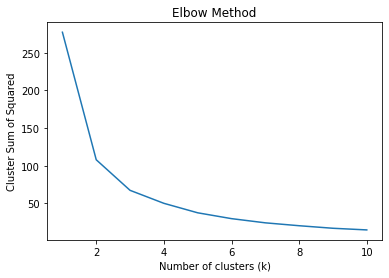

In [19]:
dist = []
# from 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    dist.append(kmeans.inertia_)
plt.plot(range(1, 11), dist)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cluster Sum of Squared') # https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

plt.savefig('kmeans_elbow.png')

plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# colors = ["red", "green", "blue"]
# df['color'] = pd.DataFrame(pred_y).map(lambda p: colors[p])

X

[[16.769688381317827, 2.415854598278587],
 [14.11545587847225, 0.7150157228460637],
 [17.41609089721905, 6.099910294189131],
 [16.00666511103301, 1.4805854388512136],
 [18.907052366545518, 8.276398402936435],
 [16.65670985570854, 5.9226577754937155],
 [16.19252237230612, 5.081457142530936],
 [14.783847385799758, 1.0248241569329226],
 [13.769333364511523, 2.377671499404715],
 [18.560642418553627, 7.191236685809316],
 [17.365014964224713, 3.551809046780824],
 [15.409191529266407, 5.766102999866793],
 [15.564160957502803, 1.8915036999405503],
 [17.52062043945283, 4.296169855544823],
 [16.957915416390126, 3.136234661397412],
 [15.810859640284669, 1.950916388678469],
 [16.009322875714446, 2.977430979808984],
 [16.290687443405858, 2.4645881116258],
 [16.811324140712582, 4.778499678424546],
 [14.46271549642224, 2.657255691948856],
 [16.28430893417007, 4.948011284236436],
 [16.65544482475941, 6.170960892873908],
 [17.417078715117082, 3.4770133081923884],
 [16.605948054506335, 3.880987874563448

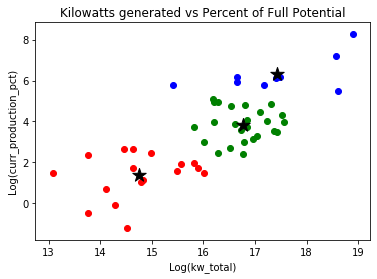

In [22]:
for i in range(len(X)):
    if pred_y[i] == 0:
        col = "blue"
    elif pred_y[i] == 1:
        col = "red"
    elif pred_y[i] == 2:
        col = "green"
    plt.scatter(X[i][0], X[i][1], c=col)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker="*", s=200, c='black')
plt.xlabel('Log(kw_total)')
plt.ylabel('Log(curr_production_pct)')
plt.title('Kilowatts generated vs Percent of Full Potential')

plt.savefig('kmeans_clusters.png')
plt.show()

In [131]:
state
p_y = list(pred_y)
for i in range(len(state)):
    state[i] = [state[i], p_y[i]]

In [132]:
state

[['Alabama', 2],
 ['Alaska', 1],
 ['Arizona', 0],
 ['Arkansas', 1],
 ['California', 0],
 ['Colorado', 0],
 ['Connecticut', 2],
 ['Delaware', 1],
 ['District of Columbia', 1],
 ['Florida', 0],
 ['Georgia', 2],
 ['Hawaii', 0],
 ['Idaho', 1],
 ['Illinois', 2],
 ['Indiana', 2],
 ['Iowa', 1],
 ['Kansas', 2],
 ['Kentucky', 2],
 ['Louisiana', 2],
 ['Maine', 1],
 ['Maryland', 2],
 ['Massachusetts', 0],
 ['Michigan', 2],
 ['Minnesota', 2],
 ['Mississippi', 1],
 ['Missouri', 2],
 ['Montana', 1],
 ['Nebraska', 1],
 ['Nevada', 2],
 ['New Hampshire', 1],
 ['New Jersey', 0],
 ['New Mexico', 2],
 ['New York', 0],
 ['North Carolina', 2],
 ['North Dakota', 1],
 ['Ohio', 2],
 ['Oklahoma', 2],
 ['Oregon', 2],
 ['Pennsylvania', 2],
 ['Rhode Island', 1],
 ['South Carolina', 2],
 ['South Dakota', 1],
 ['Tennessee', 2],
 ['Texas', 0],
 ['Utah', 2],
 ['Vermont', 1],
 ['Virginia', 2],
 ['Washington', 2],
 ['West Virginia', 1],
 ['Wisconsin', 2],
 ['Wyoming', 1]]